In [1]:
%matplotlib notebook
from ipywidgets import interact
from src.experiments import bargaining_gap_experiment
from src.experiments import total_surplus_experiment

import matplotlib.pyplot as plt

In [2]:
def intercative_plot(exp):
    data = exp.load_experiment()
    mean_data = data.groupby(['utility_type', 'mix_param', 'scale_param', 'goods_num']).mean()
    axes = mean_data.loc[
        (mean_data.index.get_level_values('mix_param') == 0.1) & 
        (mean_data.index.get_level_values('scale_param') == 1.0) &
        (mean_data.index.get_level_values('utility_type') == 'cav')
    ].droplevel(['utility_type', 'mix_param', 'scale_param']).plot()


    def update(mix_param, scale_param, utility):
        axes.clear()
        new_lines = mean_data.loc[
            (mean_data.index.get_level_values('mix_param') == mix_param) & 
            (mean_data.index.get_level_values('scale_param') == scale_param) &
            (mean_data.index.get_level_values('utility_type') == utility)
        ].droplevel(['utility_type', 'mix_param', 'scale_param']).plot(ax=axes, ylim=(0., 1.1))
        axes.figure.canvas.draw_idle()

    interact(update, utility=[n.value for n in exp.UtilityNames], **exp.calculation_params)

# 1. Bargaining gap: agents with same utility types

In [3]:
bg_exp = bargaining_gap_experiment.BargainingGapExperiment()

<IPython.core.display.Javascript object>


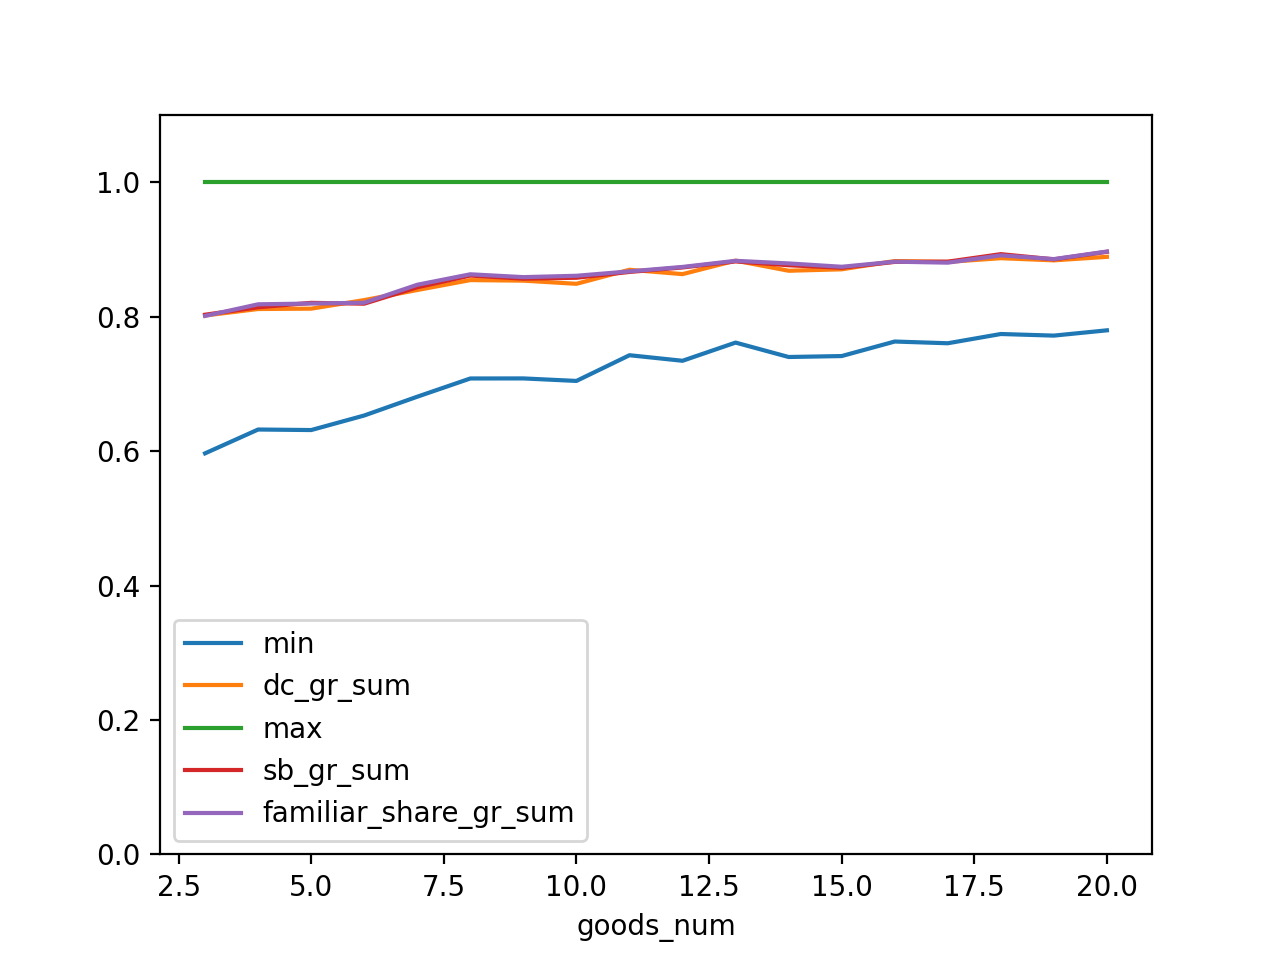

interactive(children=(Dropdown(description='mix_param', options=(0, 0.1, 0.5, 0.8), value=0), Dropdown(descrip…

In [4]:
intercative_plot(bg_exp)

# 2. Bargaining gap: agents with different utilities

In [5]:
bgm_exp = bargaining_gap_experiment.BargainingGapMixedUtilitiesExperiment()

<IPython.core.display.Javascript object>


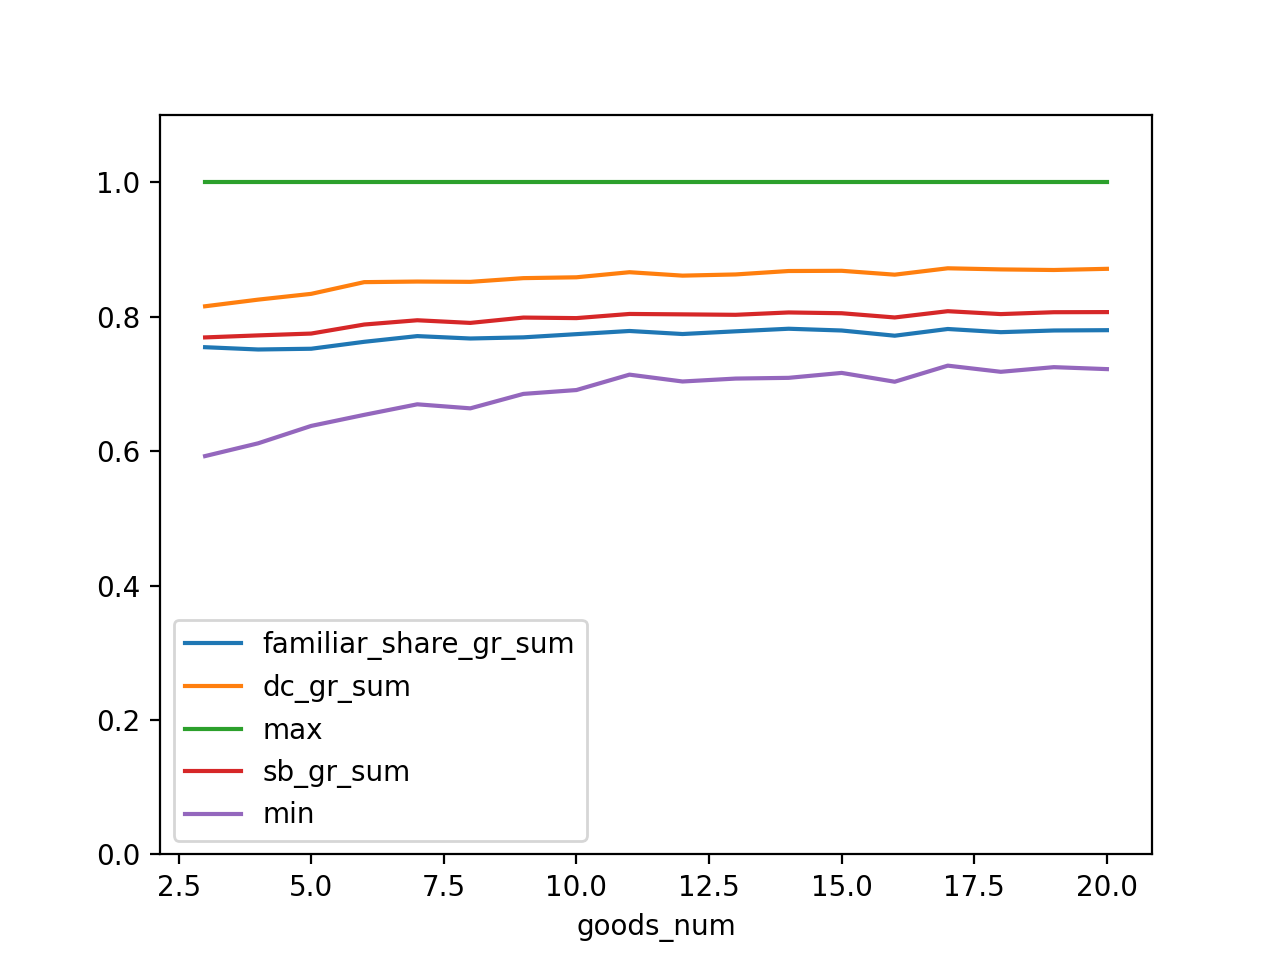

interactive(children=(Dropdown(description='mix_param', options=(0, 0.1, 0.5, 0.8), value=0), Dropdown(descrip…

In [6]:
intercative_plot(bgm_exp)

# 3. Safe play mean total surplus

In [7]:
ts_exp = total_surplus_experiment.TotalSurplusExperiment()

<IPython.core.display.Javascript object>


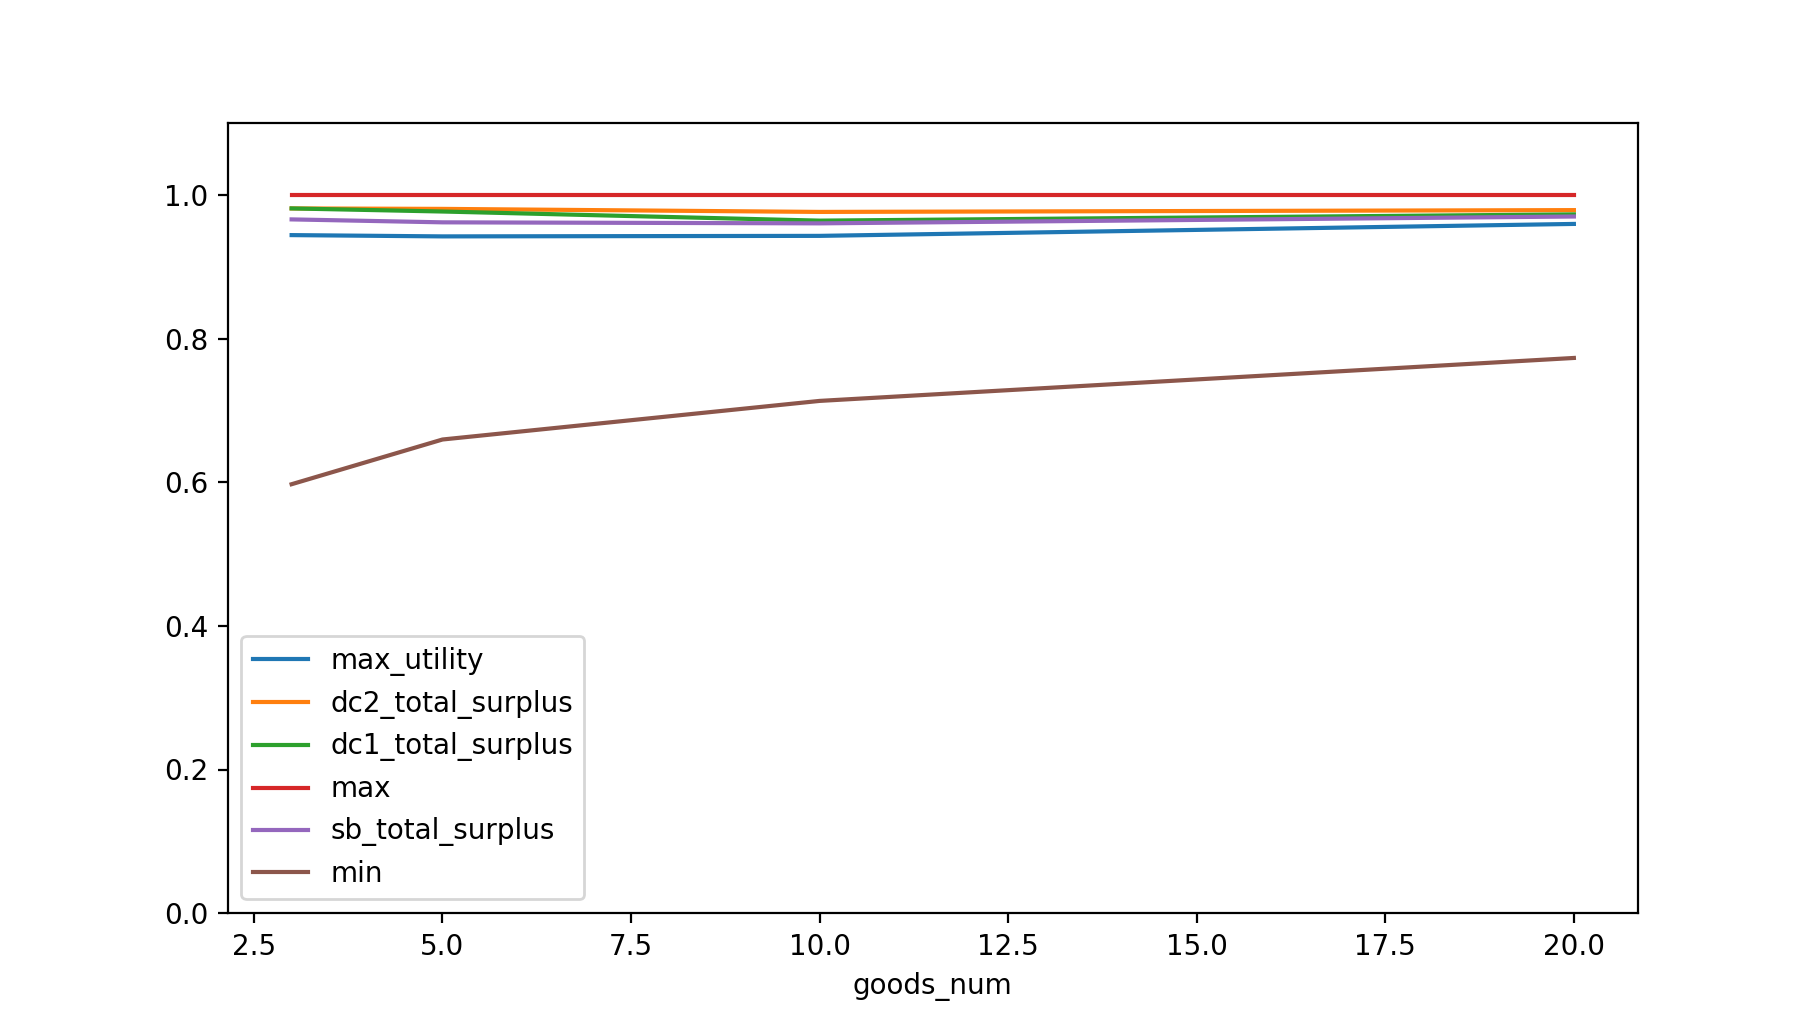

interactive(children=(Dropdown(description='mix_param', options=(0, 0.1, 0.5, 0.8), value=0), Dropdown(descrip…

In [8]:
intercative_plot(ts_exp)